Part A

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
positions=[]
folds_instructions=[]
initial_phase=True
with open("input13.txt","r") as f:
    for line in f.readlines():
        if line=="\n":
            initial_phase=False
            
        if initial_phase:
            positions.append(line)
        else:
            folds_instructions.append(line)
        

In [23]:
positions=[p.strip("\n").split(",") for p in positions]
xpositions=[int(p[0]) for p in positions]
ypositions=[int(p[1]) for p in positions]

In [26]:
folds=[]
for instruction in folds_instructions:
    if instruction=="\n":
        continue
    instruction=instruction.replace("fold along ","")
    instruction=instruction.strip("\n")
    axis, pos=instruction.split("=")
    folds.append([axis, int(pos)])

In [28]:
# matrix with all initial dots
ncols=max(xpositions)+1
nrows=max(ypositions)+1
print(ncols, nrows)

1311 892


In [32]:
orig_mat=np.zeros((nrows,ncols),dtype=np.bool)
orig_mat[ypositions,xpositions]=True

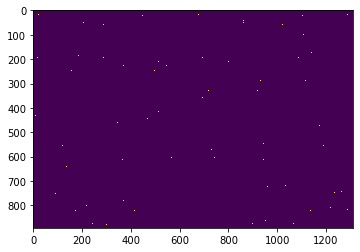

In [33]:
plt.imshow(orig_mat)

In [35]:
# first fold
folds[0]

['x', 655]

In [79]:
#ACTUALLY: The folding line is removed from the matrix. see do_one_fold() below for updated code

In [52]:
fixed_mat=orig_mat[:,:folds[0][1]+1].copy()
moving_mat=orig_mat[:,folds[0][1]+1:].copy()

In [56]:
flipped_moving_mat=moving_mat[:,::-1]

In [78]:
# add the moving mat to the fixed part
start_col=fixed_mat.shape[1]-moving_mat.shape[1]-1 # the folding edge is covered only once

output_mat=fixed_mat.copy()
output_mat[:,start_col:fixed_mat.shape[1]-1]+=flipped_moving_mat



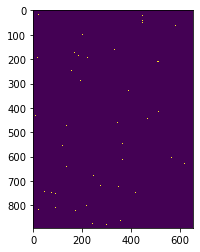

In [61]:
plt.imshow(output_mat)

In [62]:
np.sum(output_mat)

693

Part B

In [84]:
def do_one_fold(input_mat, axis, position):
    """axis: "x" or "y", position: integer (folding axis)"""    
    if axis=="x":
        fixed_mat=input_mat[:,:position].copy() # excluding the folding line
        moving_mat=input_mat[:,position+1:].copy()
        
        flipped_moving_mat=moving_mat[:,::-1]
        
        # add the moving mat to the fixed part
        start_col=fixed_mat.shape[1]-moving_mat.shape[1]
        output_mat=fixed_mat.copy()
        output_mat[:,start_col:fixed_mat.shape[1]]+=flipped_moving_mat
    else:
        fixed_mat=input_mat[:position,:].copy()
        moving_mat=input_mat[position+1:,:].copy()
        
        flipped_moving_mat=moving_mat[::-1,:]
        
        # add the moving mat to the fixed part
        start_row=fixed_mat.shape[0]-moving_mat.shape[0]
        output_mat=fixed_mat.copy()
        output_mat[start_row:fixed_mat.shape[0],:]+=flipped_moving_mat
        
    return output_mat


In [85]:
mat=orig_mat.copy()

for idx,fold in enumerate(folds):
    print(idx, fold, "\ninput shape:",mat.shape)
    mat=do_one_fold(mat,fold[0],fold[1])
    print("output shape:",mat.shape,"\n")


0 ['x', 655] 
input shape: (892, 1311)
output shape: (892, 655) 

1 ['y', 447] 
input shape: (892, 655)
output shape: (447, 655) 

2 ['x', 327] 
input shape: (447, 655)
output shape: (447, 327) 

3 ['y', 223] 
input shape: (447, 327)
output shape: (223, 327) 

4 ['x', 163] 
input shape: (223, 327)
output shape: (223, 163) 

5 ['y', 111] 
input shape: (223, 163)
output shape: (111, 163) 

6 ['x', 81] 
input shape: (111, 163)
output shape: (111, 81) 

7 ['y', 55] 
input shape: (111, 81)
output shape: (55, 81) 

8 ['x', 40] 
input shape: (55, 81)
output shape: (55, 40) 

9 ['y', 27] 
input shape: (55, 40)
output shape: (27, 40) 

10 ['y', 13] 
input shape: (27, 40)
output shape: (13, 40) 

11 ['y', 6] 
input shape: (13, 40)
output shape: (6, 40) 



In [82]:
np.sum(mat)

95

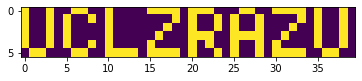

In [83]:
plt.imshow(mat)